In [2]:
# ===============================
# STEP 1: IMPORT LIBRARIES
# ===============================

import pandas as pd
import numpy as np

# Matplotlib & Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Bokeh
from bokeh.plotting import figure, output_file, save, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

# Plotly
import plotly.express as px
import plotly.graph_objects as go
sns.set_style("white") # Set seaborn style to 'white' to remove grid
sns.set_context("talk")


In [3]:
# reading the Dataset
ideal = pd.read_csv("IdealpointestimatesAll_Jun2024.csv")
agree = pd.read_csv("AgreementScoresAll_Jun2024.csv")

In [4]:
# using seaborn style to 'whilte' for removing the grid

sns.set_style("white")
sns.set_context("talk")

In [5]:
# Reading the Data Set
ideal = pd.read_csv("IdealpointestimatesAll_Jun2024.csv")
agree = pd.read_csv("AgreementScoresAll_Jun2024.csv")


In [6]:
# showing some columns of the ideal dataset
ideal.head()

,Unnamed: 0,ccode,session,NVotesAll,IdealPointAll,QO%All,Q5%All,Q10%All,Q50%All,Q90%All,Q95%All,Q100%All,iso3c,Countryname,USAgree,RUSSAgree,BrazilAgree,ChinaAgree,IndiaAgree,IsraelAgree
0,1,2,1,42,1.676350,1.099770,1.339545,1.404822,1.668589,1.958060,2.039101,2.490737,USA,United States,1.0,0.214286,0.642857,NaN,0.476191,NaN
1,2,2,2,38,1.975167,1.290319,1.559735,1.650037,1.951857,2.325626,2.488103,2.900903,USA,United States,1.0,0.263158,0.842105,NaN,0.297297,NaN
2,3,2,3,103,1.886102,1.372502,1.536494,1.602467,1.875287,2.168638,2.266258,2.562289,USA,United States,1.0,0.127451,0.776699,NaN,0.370000,0.166667
3,4,2,4,63,1.753212,1.279482,1.497219,1.549291,1.745286,1.945309,2.007389,2.251220,USA,United States,1.0,0.111111,0.539682,NaN,0.365079,0.516129
4,5,2,5,53,1.620488,0.843403,1.253614,1.333876,1.613809,1.926375,1.991641,2.423023,USA,United States,1.0,0.173077,0.811321,NaN,0.509434,0.604167


In [7]:
# showing some columns of the agreement dataset
agree.head()

,Unnamed: 0,session.x,ccode1,ccode2,agree,year,IdealPointAll.x,NVotesAll.x,IdealPointAll.y,NVotesAll.y,IdealPointDistance
0,1,1,2,20,0.853659,1946.0,1.67635,42.0,1.802806,41.0,0.126456
1,2,1,2,40,0.712500,1946.0,1.67635,42.0,1.440118,40.0,0.236232
2,3,1,2,41,0.568182,1946.0,1.67635,42.0,0.910606,22.0,0.765744
3,4,1,2,42,0.731707,1946.0,1.67635,42.0,1.610723,41.0,0.065627
4,5,1,2,70,0.565789,1946.0,1.67635,42.0,1.133682,38.0,0.542668


In [8]:
# Checking the columns in the ideal data set
ideal.columns

Index(['Unnamed: 0', 'ccode', 'session', 'NVotesAll', 'IdealPointAll',
       'QO%All', 'Q5%All', 'Q10%All', 'Q50%All', 'Q90%All', 'Q95%All',
       'Q100%All', 'iso3c', 'Countryname', 'USAgree', 'RUSSAgree',
       'BrazilAgree', 'ChinaAgree', 'IndiaAgree', 'IsraelAgree'],
      dtype='object')

In [9]:
# printing those columns
print(ideal.columns.tolist())


['Unnamed: 0', 'ccode', 'session', 'NVotesAll', 'IdealPointAll', 'QO%All', 'Q5%All', 'Q10%All', 'Q50%All', 'Q90%All', 'Q95%All', 'Q100%All', 'iso3c', 'Countryname', 'USAgree', 'RUSSAgree', 'BrazilAgree', 'ChinaAgree', 'IndiaAgree', 'IsraelAgree']


In [10]:
# checking if there any null values in the
ideal.isnull().sum()

,0
Unnamed: 0,0
ccode,0
session,0
NVotesAll,0
IdealPointAll,0
QO%All,0
Q5%All,0
Q10%All,0
Q50%All,0
Q90%All,0


In [11]:
# checking If they are NULL values in the agreement dataset
agree.isnull().sum()

,0
Unnamed: 0,0
session.x,0
ccode1,0
ccode2,0
agree,0
year,1
IdealPointAll.x,12667
NVotesAll.x,12667
IdealPointAll.y,12667
NVotesAll.y,12667


In [12]:
# Show the percentage of missing values in each column of the ideal DataFrame, sorted from highest to lowest.”
ideal.isnull().mean().sort_values(ascending=False) * 100

,0
ChinaAgree,18.588717
IsraelAgree,0.996619
RUSSAgree,0.044492
USAgree,0.008898
IndiaAgree,0.008898
BrazilAgree,0.008898
ccode,0.000000
Unnamed: 0,0.000000
NVotesAll,0.000000
session,0.000000


In [13]:
agree.isnull().mean().sort_values(ascending=False) * 100


,0
IdealPointDistance,0.845770
IdealPointAll.x,0.830430
NVotesAll.x,0.830430
NVotesAll.y,0.830430
IdealPointAll.y,0.830430
year,0.000066
Unnamed: 0,0.000000
ccode1,0.000000
session.x,0.000000
ccode2,0.000000


In [14]:
# ===============================
# NULL CHECK — IDEAL DATA (CORRECTED)
# ===============================

ideal[["Countryname", "session", "IdealPointAll"]].isnull().sum()


,0
Countryname,0
session,0
IdealPointAll,0


In [15]:
# preview of the agreement columns
agree.columns



Index(['Unnamed: 0', 'session.x', 'ccode1', 'ccode2', 'agree', 'year',
       'IdealPointAll.x', 'NVotesAll.x', 'IdealPointAll.y', 'NVotesAll.y',
       'IdealPointDistance'],
      dtype='object')

In [16]:
# ===============================
# NULL CHECK — AGREEMENT DATA (CORRECT)
# ===============================

agree.isnull().sum()


,0
Unnamed: 0,0
session.x,0
ccode1,0
ccode2,0
agree,0
year,1
IdealPointAll.x,12667
NVotesAll.x,12667
IdealPointAll.y,12667
NVotesAll.y,12667


In [17]:
# ===============================
# STEP 4A: IDEAL POINT – CLEAN DATA
# ===============================

ideal_sq = ideal.dropna(
    subset=["Countryname", "session", "IdealPointAll"]
).copy()

print("Ideal-point sub-question data shape:", ideal_sq.shape)


Ideal-point sub-question data shape: (11238, 20)


In [18]:
# ===============================
# STEP 4B: AGREEMENT – CLEAN DATA
# ===============================

agree_sq = agree.dropna(
    subset=["ccode1", "ccode2", "agree", "IdealPointDistance", "year"]
).copy()

print("Agreement sub-question data shape:", agree_sq.shape)


Agreement sub-question data shape: (1512454, 11)


In [19]:

# STEP 4C: FILTER MAJOR POWERS


major_powers = ["United States", "Russia", "China", "India"]

ideal_sq_major = ideal_sq[
    ideal_sq["Countryname"].isin(major_powers)
].copy()

print("Ideal-point (major powers):", ideal_sq_major.shape)


Ideal-point (major powers): (284, 20)


In [20]:
import pandas as pd

ideal = pd.read_csv("IdealpointestimatesAll_Jun2024.csv")

# Strip whitespace only (do NOT lowercase yet)
ideal.columns = ideal.columns.str.strip()

# Create Year from session (as per codebook)
ideal["Year"] = ideal["session"] + 1945

# Drop missing ideal points
ideal = ideal.dropna(subset=["IdealPointAll"])

# Ensure Year is integer
ideal["Year"] = ideal["Year"].astype(int)

  # How are countries distributed along the UN voting ideology spectrum in a given period?

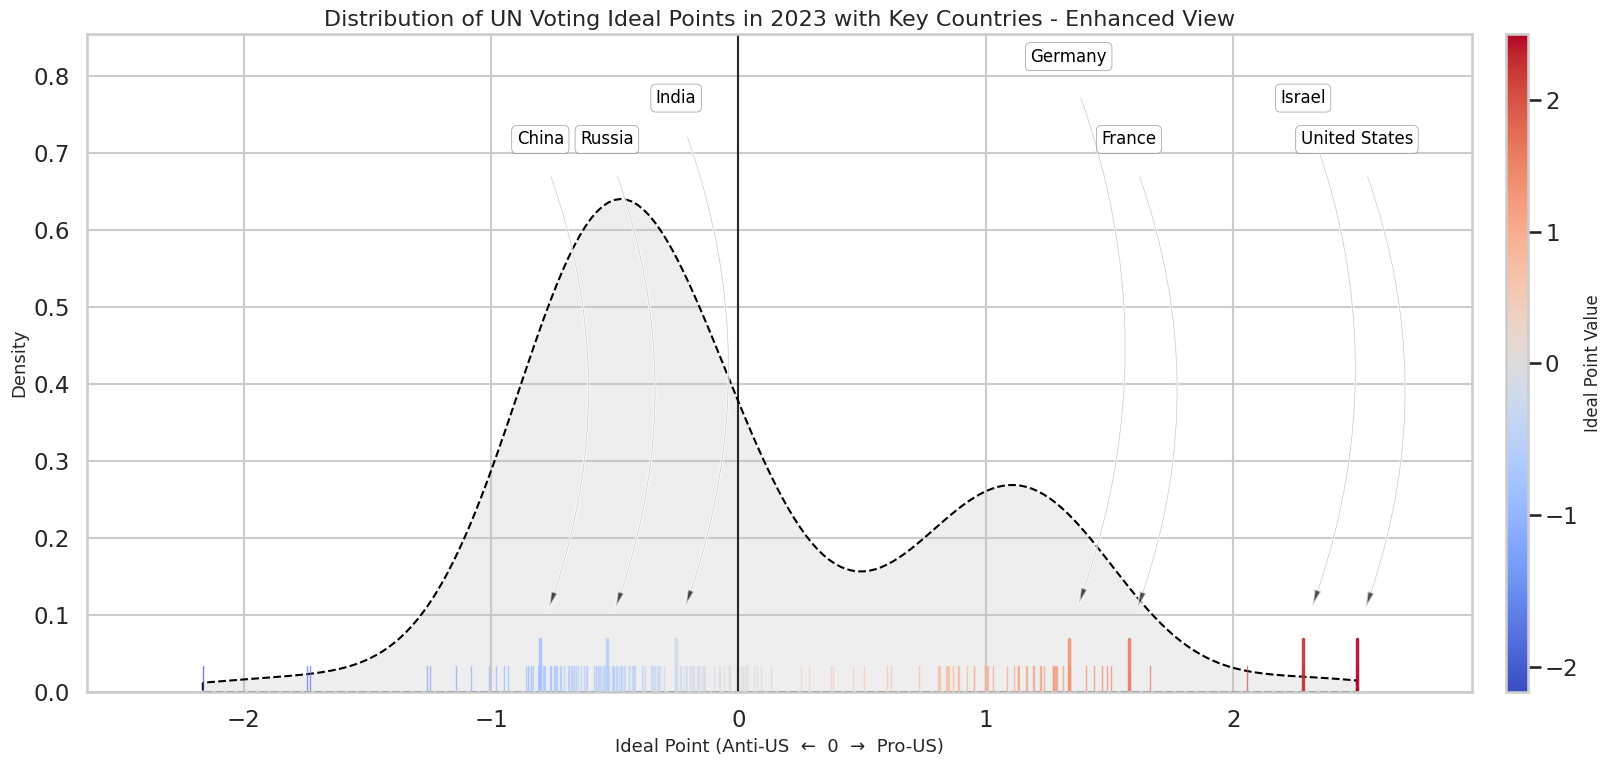

In [21]:
# ------------------------------------------------------------
# Import required modules for color handling and plotting
# ------------------------------------------------------------

# Import color normalization utilities from matplotlib
# Used to map numeric values (ideal points) to colors
from matplotlib import colors

# Import matplotlib base module (used for colorbars and figure handling)
import matplotlib as mpl


# ------------------------------------------------------------
# Set visualization style
# ------------------------------------------------------------

# Apply a clean white grid background using seaborn
# Improves readability of density plots and annotations
sns.set_style("whitegrid")


# ------------------------------------------------------------
# Filter and preprocess data for a specific year
# ------------------------------------------------------------

# Select the year for analysis
year = 2023

# Filter the main dataset to include only rows from the selected year
# .copy() is used to avoid SettingWithCopyWarning and ensure safe modifications
df_year = ideal[ideal["Year"] == year].copy()


# ------------------------------------------------------------
# Normalize ideal point values for color mapping
# ------------------------------------------------------------

# Create a diverging normalization centered at 0
# - vmin: minimum ideal point value
# - vcenter: ideological center (0)
# - vmax: maximum ideal point value
# This ensures negative and positive values are symmetrically colored
norm = colors.TwoSlopeNorm(
    vmin=df_year["IdealPointAll"].min(),
    vcenter=0,
    vmax=df_year["IdealPointAll"].max()
)

# Choose a diverging colormap
# 'coolwarm' visually distinguishes anti-US (blue) vs pro-US (red)
cmap = plt.get_cmap("coolwarm")


# ------------------------------------------------------------
# Initialize the figure and axis
# ------------------------------------------------------------

# Create a large figure for better spacing of annotations
fig, ax = plt.subplots(figsize=(18, 8))


# ------------------------------------------------------------
# Kernel Density Estimation (KDE) plot
# ------------------------------------------------------------

# Draw a KDE plot to visualize the distribution of ideal points
# KDE provides a smooth approximation of the probability density
sns.kdeplot(
    df_year["IdealPointAll"],
    ax=ax,
    fill=True,                 # Fill the area under the curve
    alpha=0.25,                # Semi-transparent fill
    color="#BDBDBD",            # Neutral gray color
    linewidth=1.5,             # Outline thickness
    linestyle="--",            # Dashed outline for contrast
    edgecolor="black",         # Black boundary for visibility
    clip=(                   # Restrict KDE to actual data range
        df_year["IdealPointAll"].min(),
        df_year["IdealPointAll"].max()
    )
)


# ------------------------------------------------------------
# Rug plot using vertical lines (all countries)
# ------------------------------------------------------------

# Draw a small vertical line for each country’s ideal point
# The color of each line represents its ideological position
for ideal_point_val in df_year["IdealPointAll"]:
    ax.axvline(
        ideal_point_val,
        ymin=0, ymax=0.04,                      # Short rug lines at bottom
        color=cmap(norm(ideal_point_val)),      # Color mapped from ideal point
        linewidth=1,
        alpha=0.7
    )


# ------------------------------------------------------------
# Identify key countries for emphasis
# ------------------------------------------------------------

# Define geopolitically important countries to highlight
key_countries = [
    "United States", "China", "Russia",
    "India", "France", "Germany", "Israel"
]

# Filter dataset to include only key countries
# Sort by ideal point for cleaner label ordering
key_df = df_year[
    df_year["Countryname"].isin(key_countries)
].sort_values(by="IdealPointAll")


# ------------------------------------------------------------
# Highlight key countries on the rug plot
# ------------------------------------------------------------

# Draw longer and thicker rug lines for key countries
for index, row in key_df.iterrows():
    country_color = cmap(norm(row["IdealPointAll"]))
    x_pos = row["IdealPointAll"]

    ax.axvline(
        x_pos,
        ymin=0, ymax=0.08,      # Longer line for emphasis
        color=country_color,
        linestyle='-',
        linewidth=2.5,
        alpha=0.9
    )


# ------------------------------------------------------------
# Prepare for annotations (labels + arrows)
# ------------------------------------------------------------

# Get the current maximum y-value of the KDE plot
kde_max_y = ax.get_ylim()[1]

# Extract ideal points and country names for labeling
ideal_points_for_labeling = key_df["IdealPointAll"].values
country_names_for_labeling = key_df["Countryname"].values


# ------------------------------------------------------------
# Dynamic label placement to avoid overlap
# ------------------------------------------------------------

# Initialize variables for collision handling
previous_label_x = -np.inf
y_stagger_level = 0
max_y_for_labels = kde_max_y


# Loop through key countries and place annotations
for country_name, x_pos in zip(
    country_names_for_labeling,
    ideal_points_for_labeling
):
    # Compute y-position for label
    # Labels are placed above the KDE curve
    y_text_pos = kde_max_y * (1.05 + y_stagger_level * 0.08)

    # Track maximum y-value needed to adjust plot limits
    max_y_for_labels = max(max_y_for_labels, y_text_pos)

    # If two labels are too close horizontally, stagger vertically
    if abs(x_pos - previous_label_x) < (
        ax.get_xlim()[1] - ax.get_xlim()[0]
    ) * 0.08:
        y_stagger_level = (y_stagger_level + 1) % 3
    else:
        y_stagger_level = 0

    previous_label_x = x_pos

    # Draw annotation with arrow
    ax.annotate(
        country_name,
        xy=(x_pos, 0.08),             # Arrow points to rug line
        xytext=(x_pos, y_text_pos),   # Label position
        arrowprops=dict(
            facecolor='black',
            shrink=0.05,
            width=0.5,
            headwidth=5,
            alpha=0.7,
            connectionstyle="arc3,rad=-0.2"
        ),
        ha='center',
        va='bottom',
        fontsize=12,
        color='black',
        bbox=dict(
            boxstyle="round,pad=0.3",
            fc="white",
            ec="0.5",
            lw=0.5,
            alpha=0.8
        )
    )


# ------------------------------------------------------------
# Add ideological center reference line
# ------------------------------------------------------------

# Vertical line at ideal point = 0 (neutral / ideological center)
ax.axvline(
    0,
    color="black",
    linestyle="-",
    linewidth=1.5,
    alpha=0.8,
    label="Ideological Center"
)


# ------------------------------------------------------------
# Axis labels and title
# ------------------------------------------------------------

ax.set_xlabel("Ideal Point (Anti-US  ←  0  →  Pro-US)", fontsize=13)
ax.set_ylabel("Density", fontsize=13)

ax.set_title(
    f"Distribution of UN Voting Ideal Points in {year} with Key Countries - Enhanced View",
    fontsize=16
)


# ------------------------------------------------------------
# Adjust axis limits for clarity
# ------------------------------------------------------------

# Add padding to x-axis so edge points are not clipped
padding_factor = 0.10
min_x = df_year["IdealPointAll"].min()
max_x = df_year["IdealPointAll"].max()
padding = (max_x - min_x) * padding_factor

ax.set_xlim(min_x - padding, max_x + padding)

# Extend y-axis to fully display labels
ax.set_ylim(bottom=0, top=max_y_for_labels * 1.05)


# ------------------------------------------------------------
# Add colorbar to explain ideological scale
# ------------------------------------------------------------

# Create a ScalarMappable for colorbar
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

# Attach colorbar to the plot
cbar = fig.colorbar(sm, ax=ax, pad=0.02, aspect=30)
cbar.set_label("Ideal Point Value", fontsize=12)


# ------------------------------------------------------------
# Save and display the figure
# ------------------------------------------------------------

# Save the plot as a high-resolution image
plt.savefig(
    "UN_voting_2023.png",
    dpi=300,
    bbox_inches="tight",
    facecolor=fig.get_facecolor()
)

# Optimize spacing
plt.tight_layout()

# Render the plot
plt.show()


# How has the global spread of UN voting positions evolved over time, and where do major powers sit within that spread?

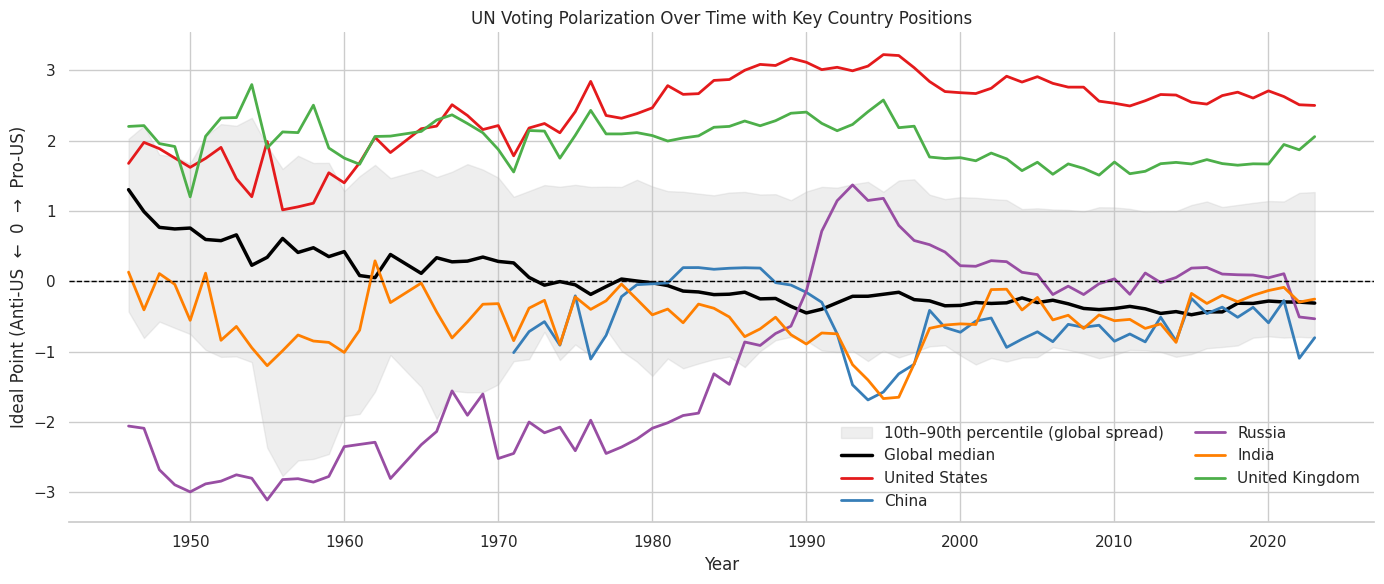

In [22]:

# ------------------------------------------------------------
# Set a clean global plotting theme
# ------------------------------------------------------------

# Apply seaborn's whitegrid theme for better readability
sns.set_theme(style="whitegrid")


# ------------------------------------------------------------
# Global distribution summary (data preprocessing step)
# ------------------------------------------------------------

# Group the dataset by Year and compute summary statistics
# on the IdealPointAll variable
summary = (
    ideal
    .groupby("Year")["IdealPointAll"]  # Group data year-wise
    .agg(
        median="median",               # Central tendency of global voting
        q10=lambda x: x.quantile(0.10),# Lower bound (10th percentile)
        q90=lambda x: x.quantile(0.90) # Upper bound (90th percentile)
    )
    .reset_index()                     # Convert index back to column
)

# This summary dataframe captures:
# - Global median ideological position per year
# - Spread of countries (polarization) between 10th and 90th percentiles


# ------------------------------------------------------------
# Define key countries for focused comparison
# ------------------------------------------------------------

# Select geopolitically influential countries
key_countries = [
    "United States",
    "China",
    "Russia",
    "India",
    "United Kingdom"
]

# Filter the original dataset to include only these countries
# .copy() ensures safe downstream modifications
df_keys = ideal[ideal["Countryname"].isin(key_countries)].copy()


# ------------------------------------------------------------
# Assign fixed colors to key countries
# ------------------------------------------------------------

# Explicit color mapping ensures visual consistency across plots
country_colors = {
    "United States": "#E41A1C",     # Red
    "China": "#377EB8",             # Blue
    "Russia": "#984EA3",            # Purple
    "India": "#FF7F00",             # Orange
    "United Kingdom": "#4DAF4A"     # Green
}


# ------------------------------------------------------------
# Initialize the figure
# ------------------------------------------------------------

# Create a wide figure suitable for time-series visualization
plt.figure(figsize=(14, 6))


# ------------------------------------------------------------
# Plot global polarization band (quantile spread)
# ------------------------------------------------------------

# Fill the area between the 10th and 90th percentiles
# This shaded region represents global ideological dispersion
plt.fill_between(
    summary["Year"],     # X-axis: time
    summary["q10"],      # Lower bound
    summary["q90"],      # Upper bound
    alpha=0.25,          # Transparency for layering
    color="#BDBDBD",     # Neutral gray
    label="10th–90th percentile (global spread)"
)


# ------------------------------------------------------------
# Plot global median trend
# ------------------------------------------------------------

# Draw the median ideal point line across years
# Represents the central global voting tendency
plt.plot(
    summary["Year"],
    summary["median"],
    color="black",
    linewidth=2.5,
    label="Global median"
)


# ------------------------------------------------------------
# Overlay trajectories of key countries
# ------------------------------------------------------------

# Plot each key country’s ideal point over time
for country in key_countries:
    # Extract data for the specific country
    df_c = df_keys[df_keys["Countryname"] == country]

    # Plot time-series line for the country
    plt.plot(
        df_c["Year"],
        df_c["IdealPointAll"],
        label=country,
        color=country_colors[country],
        linewidth=2
    )


# ------------------------------------------------------------
# Add ideological center reference
# ------------------------------------------------------------

# Horizontal line at IdealPoint = 0
# Separates Anti-US and Pro-US voting blocs
plt.axhline(
    0,
    color="black",
    linestyle="--",
    linewidth=1
)


# ------------------------------------------------------------
# Labels and title
# ------------------------------------------------------------

plt.xlabel("Year")
plt.ylabel("Ideal Point (Anti-US  ←  0  →  Pro-US)")

plt.title("UN Voting Polarization Over Time with Key Country Positions")


# ------------------------------------------------------------
# Legend and aesthetic cleanup
# ------------------------------------------------------------

# Display legend without surrounding box
# ncol=2 improves compactness
plt.legend(frameon=False, ncol=2)

# Remove left and top spines for cleaner look
sns.despine(left=True)


# ------------------------------------------------------------
# Save the figure
# ------------------------------------------------------------

# Export the visualization as a high-resolution image
plt.savefig(
    "voting_Polarization.png",
    dpi=300,
    bbox_inches="tight",
    facecolor=plt.gcf().get_facecolor()  # Match figure background
)


# ------------------------------------------------------------
# Final layout adjustment and rendering
# ------------------------------------------------------------

# Adjust spacing to avoid overlaps
plt.tight_layout()

# Display the plot
plt.show()



# Do major powers move together or diverge in their UN voting positions over time?

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


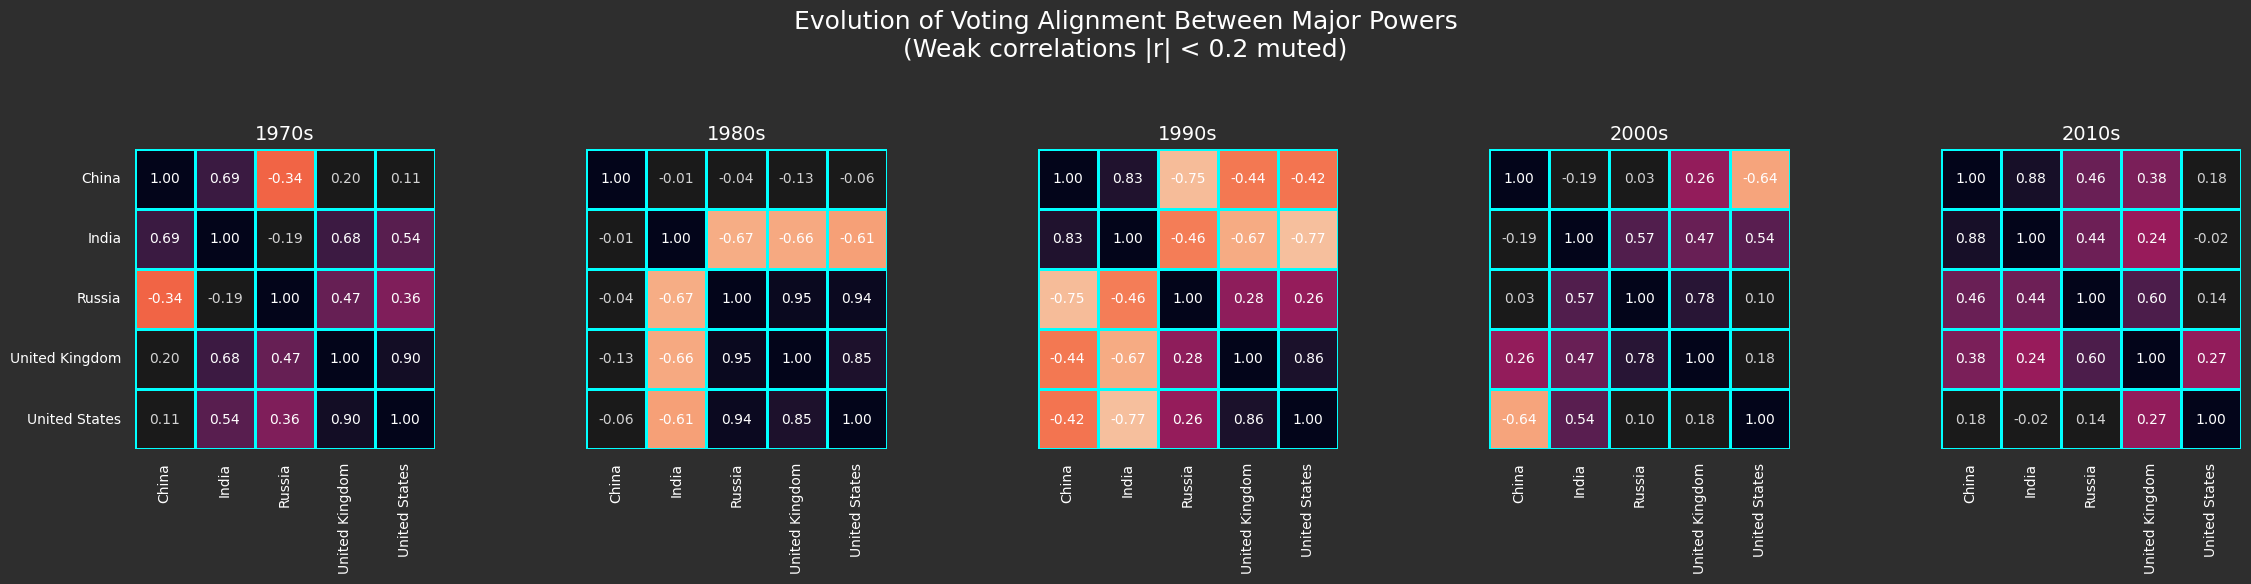

In [23]:
# ------------------------------------------------------------
# Set global visualization theme
# ------------------------------------------------------------

# Use a dark grid theme with a perceptually uniform palette
# Dark theme emphasizes contrast in correlation heatmaps
sns.set_theme(style="darkgrid", palette="viridis")


# ------------------------------------------------------------
# 1. Select key countries (data filtering)
# ------------------------------------------------------------

# Define major geopolitical actors to analyze alignment patterns
countries = [
    "United States",
    "China",
    "Russia",
    "India",
    "United Kingdom"
]

# Filter the dataset to include only these countries
# .copy() avoids chained assignment issues later
df = ideal[ideal["Countryname"].isin(countries)].copy()


# ------------------------------------------------------------
# 2. Create a decade-level variable (feature engineering)
# ------------------------------------------------------------

# Convert Year into Decade
# Example: 1994 → 1990, 2007 → 2000
df["Decade"] = (df["Year"] // 10) * 10

# Explicit list of decades to visualize
decades = [1970, 1980, 1990, 2000, 2010]


# ------------------------------------------------------------
# 3. Create small-multiple layout (one heatmap per decade)
# ------------------------------------------------------------

# Create a row of subplots, one for each decade
# sharey=True ensures consistent country ordering across panels
fig, axes = plt.subplots(
    1,
    len(decades),
    figsize=(24, 5),
    sharey=True
)


# ------------------------------------------------------------
# Define correlation threshold for "weak alignment"
# ------------------------------------------------------------

# Absolute correlations below this threshold are treated as weak
# These will be visually muted in the heatmap
threshold = 0.20


# ------------------------------------------------------------
# Loop through decades and generate correlation heatmaps
# ------------------------------------------------------------

for ax, decade in zip(axes, decades):

    # --------------------------------------------------------
    # Subset data for the given decade
    # --------------------------------------------------------

    subset = df[df["Decade"] == decade]

    # --------------------------------------------------------
    # Reshape data into matrix form (Year × Country)
    # --------------------------------------------------------

    # Each column = a country
    # Each row = a year
    # Values = IdealPointAll
    pivot = subset.pivot(
        index="Year",
        columns="Countryname",
        values="IdealPointAll"
    )

    # --------------------------------------------------------
    # Compute pairwise voting alignment
    # --------------------------------------------------------

    # Pearson correlation captures similarity in voting trajectories
    corr = pivot.corr(method="pearson")

    # --------------------------------------------------------
    # Identify weak correlations
    # --------------------------------------------------------

    # Mask values where absolute correlation is below threshold
    weak_mask = corr.abs() < threshold


    # --------------------------------------------------------
    # Heatmap 1: Strong correlations (highlighted)
    # --------------------------------------------------------

    sns.heatmap(
        corr,
        ax=ax,
        cmap="rocket_r",     # High-contrast diverging colormap
        center=0,            # Neutral alignment at zero
        vmin=-1,
        vmax=1,
        square=True,
        cbar=False,          # Shared colorbar omitted for clarity
        linewidths=1.0,      # Grid separation
        linecolor="#00FFFF", # Cyan grid lines for cyber-style look
        annot=True,          # Show correlation values
        fmt=".2f",
        annot_kws={
            "size": 10,
            "color": "white" # White text for strong correlations
        },
        mask=weak_mask       # Hide weak correlations here
    )


    # --------------------------------------------------------
    # Heatmap 2: Weak correlations (muted)
    # --------------------------------------------------------

    # Overlay a second heatmap to visually suppress weak correlations
    sns.heatmap(
        corr,
        ax=ax,
        cmap=["#1A1A1A"],    # Dark gray for weak alignment
        cbar=False,
        square=True,
        linewidths=1.0,
        linecolor="#00FFFF",
        mask=~weak_mask,     # Only show weak correlations
        annot=True,
        fmt=".2f",
        annot_kws={
            "size": 10,
            "color": "lightgray" # Lower emphasis text
        }
    )


    # --------------------------------------------------------
    # Axis formatting
    # --------------------------------------------------------

    ax.set_title(f"{decade}s", fontsize=14, color="white")
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Set tick colors to match dark background
    ax.tick_params(axis="x", colors="white", labelsize=10)
    ax.tick_params(axis="y", colors="white", labelsize=10, rotation=0)


# ------------------------------------------------------------
# Global title (story framing)
# ------------------------------------------------------------

plt.suptitle(
    "Evolution of Voting Alignment Between Major Powers\n"
    "(Weak correlations |r| < 0.2 muted)",
    fontsize=18,
    y=1.10,
    color="white"
)


# ------------------------------------------------------------
# Match figure and axes background to dark theme
# ------------------------------------------------------------

# Set figure background color
fig.patch.set_facecolor("#2E2E2E")

# Set background color for each subplot
for ax in axes:
    ax.set_facecolor("#2E2E2E")


# ------------------------------------------------------------
# Save high-resolution output
# ------------------------------------------------------------

plt.savefig(
    "voting_alignment_heatmap_by_decade.png",
    dpi=300,
    bbox_inches="tight",
    facecolor=fig.get_facecolor()
)


# ------------------------------------------------------------
# Final layout adjustment and display
# ------------------------------------------------------------

plt.tight_layout()
plt.show()


# “How consistently do countries align with major powers, and how asymmetric are these relationships?”

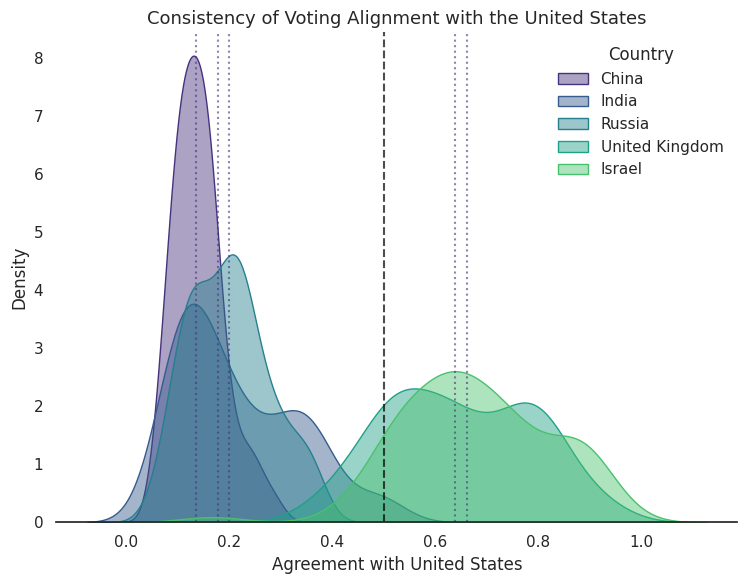

In [24]:


sns.set_style("white")

# =============================
# DATA PREP
# =============================

focus_countries = ["United Kingdom", "Israel", "India", "China", "Russia"]

df_focus = ideal[ideal["Countryname"].isin(focus_countries)].copy()

# Order countries by median US agreement (for ridge plot)
country_order = (
    df_focus.groupby("Countryname")["USAgree"]
    .median()
    .sort_values()
    .index
)

# =============================
# FIGURE LAYOUT
# =============================

fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1.1, 1])

# =============================
# PLOT 1 — ENHANCED RIDGE
# =============================

ax1 = fig.add_subplot(gs[0, 0])

for country in country_order:
    subset = df_focus[df_focus["Countryname"] == country]

    sns.kdeplot(
        data=subset,
        x="USAgree",
        fill=True,
        alpha=0.45,
        linewidth=1,
        ax=ax1,
        label=country
    )

    # Median marker
    med = subset["USAgree"].median()
    ax1.axvline(med, linestyle=":", alpha=0.6)

ax1.axvline(0.5, color="black", linestyle="--", alpha=0.7)

ax1.set_title(
    "Consistency of Voting Alignment with the United States",
    fontsize=13
)
ax1.set_xlabel("Agreement with United States")
ax1.set_ylabel("Density")
ax1.legend(title="Country", frameon=False)

sns.despine(ax=ax1, left=True)
plt.savefig(
    "voting_alignment_with_US.png",
    dpi=300,
    bbox_inches="tight",
    facecolor=fig.get_facecolor() # Save with dark background
)

# =============================
# PLOT 4 — ENHANCED HEATMAP
# =============================


plt.tight_layout()
plt.show()


# Which countries are persistently isolated or highly aligned in UN voting, and how extreme are their voting positions relative to the global distribution?

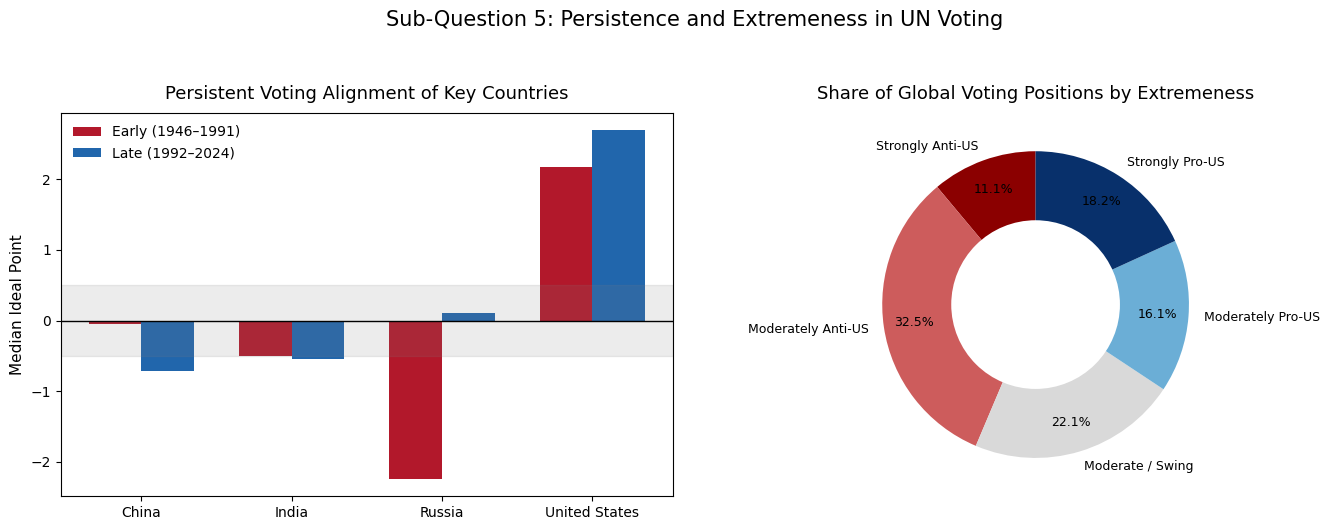

In [26]:


plt.style.use("default")

# -----------------------------
# PERIOD LABEL
# -----------------------------
ideal["Period"] = ideal["session"].apply(
    lambda x: "Early (1946–1991)" if x <= 46 else "Late (1992–2024)"
)

countries = ["United States", "Russia", "China", "India"]

# -----------------------------
# BAR CHART DATA
# -----------------------------
bar_df = (
    ideal[ideal["Countryname"].isin(countries)]
    .groupby(["Countryname", "Period"])["IdealPointAll"]
    .median()
    .unstack()
)

# -----------------------------
# DONUT DATA
# -----------------------------
bins = [-3, -1, -0.3, 0.3, 1, 3]
labels = [
    "Strongly Anti-US",
    "Moderately Anti-US",
    "Moderate / Swing",
    "Moderately Pro-US",
    "Strongly Pro-US"
]

ideal["Category"] = pd.cut(
    ideal["IdealPointAll"], bins=bins, labels=labels
)

donut_counts = ideal["Category"].value_counts().sort_index()

# -----------------------------
# FIGURE LAYOUT
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# =============================
# BAR CHART (PYplot)
# =============================
x = np.arange(len(bar_df.index))
width = 0.35

early_vals = bar_df["Early (1946–1991)"]
late_vals = bar_df["Late (1992–2024)"]

axes[0].bar(
    x - width/2,
    early_vals,
    width,
    label="Early (1946–1991)",
    color="#b2182b"
)

axes[0].bar(
    x + width/2,
    late_vals,
    width,
    label="Late (1992–2024)",
    color="#2166ac"
)

# Reference lines
axes[0].axhline(0, color="black", linewidth=1)
axes[0].axhspan(-0.5, 0.5, color="gray", alpha=0.15)

axes[0].set_xticks(x)
axes[0].set_xticklabels(bar_df.index, fontsize=10)
axes[0].set_ylabel("Median Ideal Point", fontsize=11)

axes[0].set_title(
    "Persistent Voting Alignment of Key Countries",
    fontsize=13,
    pad=10
)

axes[0].legend(frameon=False)

# =============================
# DONUT CHART (PYplot)
# =============================
colors = ["#8b0000", "#cd5c5c", "#d9d9d9", "#6baed6", "#08306b"]

axes[1].pie(
    donut_counts.values,
    labels=donut_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    pctdistance=0.8,
    textprops={"fontsize": 9}
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.55, fc="white")
axes[1].add_artist(centre_circle)

axes[1].set_title(
    "Share of Global Voting Positions by Extremeness",
    fontsize=13,
    pad=10
)

# -----------------------------
# OVERALL TITLE & SAVE
# -----------------------------
plt.suptitle(
    "Sub-Question 5: Persistence and Extremeness in UN Voting",
    fontsize=15,
    y=1.05
)
plt.savefig(
    "Major_powers_voting_alignment.png",
    dpi=300,
    bbox_inches="tight",
    facecolor=fig.get_facecolor() # Save with dark background
)

plt.tight_layout()
plt.savefig("bar_donut_pyplot.png", dpi=300, bbox_inches="tight")
plt.show()


### Generate Interactive Stacked Area Plot with Plotly

/tmp/ipython-input-1815954438.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Year", "Category"])


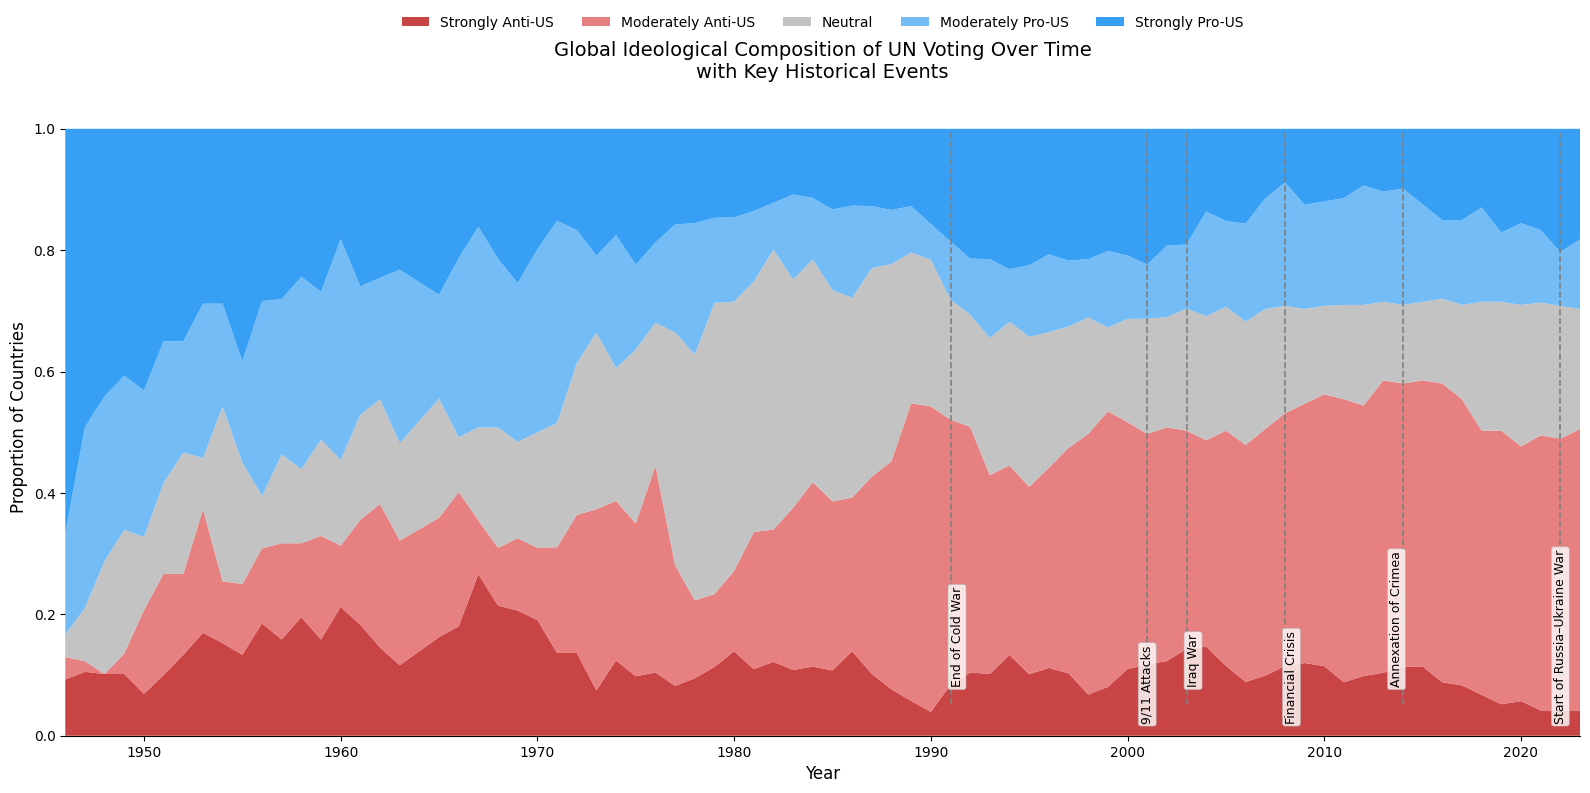

In [30]:




# ============================================================
# VISUAL STYLE
# ============================================================

sns.set_theme(style="whitegrid")
plt.style.use("default")


# ============================================================
# ASSUMPTION
# ============================================================
# DataFrame `ideal` already exists with columns:
# - Year
# - IdealPointAll
# - Countryname
# - session
#
# If ideal is loaded from CSV, uncomment:
# ideal = pd.read_csv("your_file.csv")


# ============================================================
# STEP 1: CREATE IDEOLOGICAL CATEGORIES
# ============================================================

bins = [-3, -1, -0.3, 0.3, 1, 3]
labels = [
    "Strongly Anti-US",
    "Moderately Anti-US",
    "Neutral",
    "Moderately Pro-US",
    "Strongly Pro-US"
]

ideal["Category"] = pd.cut(
    ideal["IdealPointAll"],
    bins=bins,
    labels=labels
)


# ============================================================
# STEP 2: CALCULATE PROPORTIONS PER YEAR
# ============================================================

category_counts = (
    ideal
    .groupby(["Year", "Category"])
    .size()
    .reset_index(name="count")
)

category_counts["proportion"] = (
    category_counts["count"]
    / category_counts.groupby("Year")["count"].transform("sum")
)


# ============================================================
# STEP 3: CREATE PIVOT TABLE (THIS FIXES YOUR ERROR)
# ============================================================

pivot_df = (
    category_counts
    .pivot(index="Year", columns="Category", values="proportion")
    .fillna(0)
    .sort_index()
)


# ============================================================
# STEP 4: DEFINE HISTORICAL EVENTS
# ============================================================

historical_events = {
    "End of Cold War": 1991,
    "9/11 Attacks": 2001,
    "Iraq War": 2003,
    "Financial Crisis": 2008,
    "Annexation of Crimea": 2014,
    "Start of Russia–Ukraine War": 2022
}

event_annotations = {
    "End of Cold War": {"y_offset": 0.08, "ha": "left"},
    "9/11 Attacks": {"y_offset": 0.02, "ha": "center"},
    "Iraq War": {"y_offset": 0.08, "ha": "left"},
    "Financial Crisis": {"y_offset": 0.02, "ha": "left"},
    "Annexation of Crimea": {"y_offset": 0.08, "ha": "right"},
    "Start of Russia–Ukraine War": {"y_offset": 0.02, "ha": "center"},
}


# ============================================================
# STEP 5: CREATE FIGURE
# ============================================================

fig, ax = plt.subplots(figsize=(16, 8))

colors = [
    "#C42F2F",  # Strongly Anti-US
    "#E57373",  # Moderately Anti-US
    "#BDBDBD",  # Neutral
    "#64B5F6",  # Moderately Pro-US
    "#2196F3"   # Strongly Pro-US
]


# ============================================================
# STEP 6: STACKED AREA PLOT
# ============================================================

ax.stackplot(
    pivot_df.index,
    pivot_df.T,
    labels=pivot_df.columns,
    colors=colors,
    alpha=0.9
)


# ============================================================
# STEP 7: ADD HISTORICAL EVENT ANNOTATIONS
# ============================================================

for event, year in historical_events.items():
    if year in pivot_df.index:
        ax.axvline(
            year,
            color="gray",
            linestyle="--",
            linewidth=1.2,
            ymin=0.05,
            ymax=0.95
        )

        y_pos = event_annotations[event]["y_offset"]
        ha_align = event_annotations[event]["ha"]

        ax.text(
            year,
            y_pos,
            event,
            fontsize=9,
            color="black",
            ha=ha_align,
            rotation=90,
            va="bottom",
            bbox=dict(
                boxstyle="round,pad=0.2",
                fc="white",
                ec="0.7",
                lw=0.5,
                alpha=0.8
            )
        )


# ============================================================
# STEP 8: LABELS, TITLE, LEGEND
# ============================================================

ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Proportion of Countries", fontsize=12)

ax.set_title(
    "Global Ideological Composition of UN Voting Over Time\n"
    "with Key Historical Events",
    fontsize=14,
    pad=15
)

ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=5,
    frameon=False,
    fontsize=10
)

ax.set_xlim(pivot_df.index.min(), pivot_df.index.max())


# ============================================================
# STEP 9: FINAL POLISH
# ============================================================

sns.despine(left=True)
plt.tight_layout()


# ============================================================
# STEP 10: SAVE & SHOW
# ============================================================

plt.savefig(
    "enhanced_stacked_area_plot.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
